In [2]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
a = 0.06
points_1 = []
points_2 = []
intersection_points_1 = []
intersection_points_2 = []
points_inside_region_1 = []
intersections_lines = []
N = 200
alphas = []

In [4]:
def points(N):
    for i in range(N):
        x_1 = np.random.uniform(0, 1)
        y_1 = np.random.uniform(0, 1)
        points_1.append((x_1, y_1))
        
        alpha_value = np.random.uniform(0, 2 * np.pi)
        alphas.append(alpha_value)

        x_2 = x_1 + a * np.cos(alpha_value)
        y_2 = y_1 + a * np.sin(alpha_value)

        points_2.append((x_2, y_2))

In [5]:
points(N)

In [6]:
def plot_lines(N):
    # Define custom colors
    line_color = 'steelblue'
    marker_color = 'none'

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=line_color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()


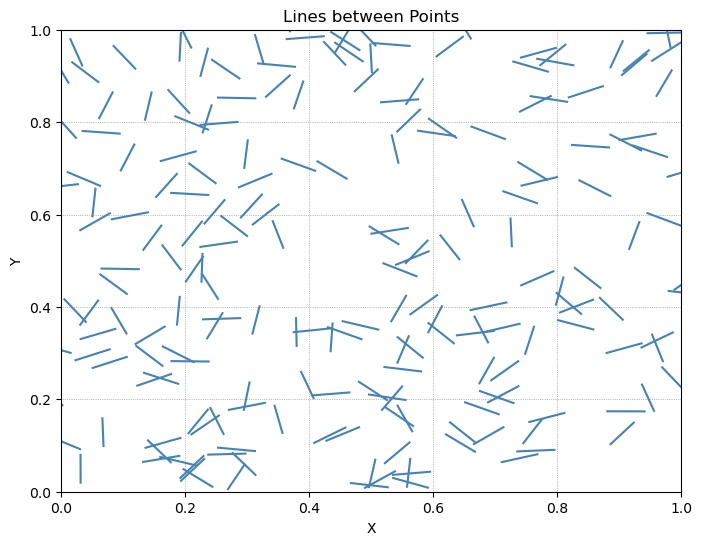

In [7]:
plot_lines(N)

### Region I

#### Inf 1

$x \in [0, \frac{a}{2}]$

$y \in [a - \sqrt{a^2 - (x-a)^2}, a]$

$\theta \in [\arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)}]$

In [8]:
def is_point_inside_region_1_inferior_1(a, x, y, theta):
    if x >= 0 and x <= a/2:
        lower_limit_y = a - math.sqrt(a**2 - (x - a)**2)
        
        if y >= lower_limit_y and y <= a:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

#### Inf 2

$x \in [\frac{a}{2}, a]$

$y \in [a - \sqrt{a^2 - x^2}, a]$

$\theta \in [\arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)}]$


In [9]:
def is_point_inside_region_1_inferior_2(a, x, y, theta):
    if x >= a/2 and x <= a:
        lower_limit_y = a - math.sqrt(a**2 - x**2)
        
        if y >= lower_limit_y and y <= a:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

#### Sup 1

$x \in [0, \frac{a}{2}]$

$y \in [a, a + \sqrt{a^2 - (x-a)^2}]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$


In [10]:
def is_point_inside_region_1_superior_1(a, x, y, theta):
    if x >= 0 and x <= a/2:
        lower_limit_y = a
        upper_limit_y = a + math.sqrt(a**2 - (x - a)**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False


#### Sup 2

$x \in [\frac{a}{2}, a]$

$y \in [a, a + \sqrt{a^2 - x^2}]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$

In [11]:
def is_point_inside_region_1_superior_2(a, x, y, theta):
    if x >= a/2 and x <= a:
        lower_limit_y = a
        upper_limit_y = a + math.sqrt(a**2 - x**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False


### Defining a function that calls all the functions related to the sections of this region.

In [12]:
def is_point_inside_region_1(x, y, theta, a):
    inferior_1_region_1 = is_point_inside_region_1_inferior_1(a, x, y, theta)
    inferior_2_region_1 = is_point_inside_region_1_inferior_2(a, x, y, theta)
    superior_1_region_1 = is_point_inside_region_1_superior_1(a, x, y, theta)
    superior_2_region_1 = is_point_inside_region_1_superior_2(a, x, y, theta)

    return inferior_1_region_1 or inferior_2_region_1 or superior_1_region_1 or superior_2_region_1

### Region II

#### Inf 1

$x \in [0, \frac{a}{2}]$

$y \in [a - \sqrt{a^2 - x^2}, a - \sqrt{a^2 - (x - a)^2}]$

$\theta \in [\arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)}]$



In [13]:
def is_point_inside_region_2_inferior_1(a, x, y, theta):
    if x >= 0 and x <= a/2:
        square_root_1 = math.sqrt(a**2 - x**2)
        square_root_2 = math.sqrt(a**2 - (x - a)**2)
        
        if y >= a - square_root_1 and y <= a - square_root_2:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

#### inf 2
$x \in [\frac{a}{2}, a]$

$y \in [a - \sqrt{a^2 - (x - a)^2}, a - \sqrt{a^2 - x^2}]$

$\theta \in [\arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)}]$


In [14]:
def is_point_inside_region_2_inferior_2(a, x, y, theta):
    if x >= a/2 and x <= a:
        square_root_1 = math.sqrt(a**2 - (x - a)**2)
        square_root_2 = math.sqrt(a**2 - x**2)
        
        if y >= a - square_root_1 and y <= a - square_root_2:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

#### sup 1
$x \in [0, \frac{a}{2}]$

$y \in [a + \sqrt{a^2 - (x - a)^2}, a + \sqrt{a^2 - x^2}]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$

In [15]:
def is_point_inside_region_2_superior_1(a, x, y, theta):
    if x >= 0 and x <= a/2:
        lower_limit_y = a + math.sqrt(a**2 - (x - a)**2)
        upper_limit_y = a + math.sqrt(a**2 - x**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

#### sup 2
$x \in \left[\frac{a}{2}, a\right]$

$y \in \left[a + \sqrt{a^2 - x^2}, a + \sqrt{a^2 - (x - a)^2}\right]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$

In [16]:
def is_point_inside_region_2_superior_2(a, x, y, theta):
    if x >= a/2 and x <= a:
        lower_limit_y = a + math.sqrt(a**2 - x**2)
        upper_limit_y = a + math.sqrt(a**2 - (x - a)**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

### Defining a function that calls all the functions related to the sections of this region.

In [17]:
def is_point_inside_region_2(x, y, theta, a):
    inferior_1_region_2 = is_point_inside_region_2_inferior_1(a, x, y, theta)
    inferior_2_region_2 = is_point_inside_region_2_inferior_2(a, x, y, theta)
    superior_1_region_2 = is_point_inside_region_2_superior_1(a, x, y, theta)
    superior_2_region_2 = is_point_inside_region_2_superior_2(a, x, y, theta)

    return inferior_1_region_2 or inferior_2_region_2 or superior_1_region_2 or superior_2_region_2

### Region III

Inf 1

$x \in [0, \frac{a}{2}]$

$y \in [0, a - \sqrt{a^2 - x^2}]$

$\theta \in [\arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)}]$


In [18]:
def is_point_inside_region_3_inferior_1(a, x, y, theta):
    if x >= 0 and x <= a/2:
        upper_limit_y = a - math.sqrt(a**2 - x**2)
        
        if y >= 0 and y <= upper_limit_y:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False


Inf 2

$x \in [\frac{a}{2}, a]$

$y \in [0, a - \sqrt{a^2 - (x - a)^2}]$

$\theta \in [\arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)}]$


In [19]:
def is_point_inside_region_3_inferior_2(a, x, y, theta):
    if x >= a/2 and x <= a:
        upper_limit_y = a - math.sqrt(a**2 - (x - a)**2)
        
        if y >= 0 and y <= upper_limit_y:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

#### Sup 1

$x \in [0, \frac{a}{2}]$

$y \in [a, a + \sqrt{a^2 - (x-a)^2}]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$

In [20]:
def is_point_inside_region_3_superior_1(a, x, y, theta):
    if x >= 0 and x <= a/2:
        lower_limit_y = a
        upper_limit_y = a + math.sqrt(a**2 - (x - a)**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False



#### Sup 2

$x \in [a, \frac{a}{2}]$

$y \in [a, a + \sqrt{a^2 - x^2}]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$

In [21]:
def is_point_inside_region_3_superior_2(a, x, y, theta):
    if x >= a/2 and x <= a:
        lower_limit_y = a
        upper_limit_y = a + math.sqrt(a**2 - x**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

### Defining a function that calls all the functions related to the sections of this region.

In [22]:
def is_point_inside_region_3(x, y, theta, a):
    inferior_1_region_3 = is_point_inside_region_3_inferior_1(a, x, y, theta)
    inferior_2_region_3 = is_point_inside_region_3_inferior_2(a, x, y, theta)
    superior_1_region_3 = is_point_inside_region_3_superior_1(a, x, y, theta)
    superior_2_region_3 = is_point_inside_region_3_superior_2(a, x, y, theta)

    return inferior_1_region_3 or inferior_2_region_3 or superior_1_region_3 or superior_2_region_3

### Region IV

#### Inf 1

$x \in [-a, 0]$

$y \in [a - \sqrt{a^2 - x^2}, a]$

$\theta \in \left[ \arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)} \right]$

In [23]:
def is_point_inside_region_4_inferior_1(a, x, y, theta):
    if x >= -a and x <= 0:
        lower_limit_y = a - math.sqrt(a**2 - x**2)
        upper_limit_y = a
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False


#### Inf 2

$x \in [a, 2a]$

$y \in [a - \sqrt{a^2 - (x - a)^2}, a]$

$\theta \in \left[ \arctan{\left(\frac{a - y}{a - x}\right)}, \frac{\pi}{2} + \arctan{\left(\frac{x}{a - y}\right)} \right]$

In [24]:
def is_point_inside_region_4_inferior_2(a, x, y, theta):
    if x >= a and x <= 2*a:
        lower_limit_y = a - math.sqrt(a**2 - (x - a)**2)
        upper_limit_y = a
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = math.atan((a - y) / (a - x))
            atan_2 = math.pi/2 + math.atan(x / (a - y))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False


#### Sup 1

$x \in [-a, 0]$

$y \in [a, a + \sqrt{a^2 - x^2}]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$

In [25]:
def is_point_inside_region_4_superior_1(a, x, y, theta):
    if x >= -a and x <= 0:
        lower_limit_y = a
        upper_limit_y = a + math.sqrt(a**2 - x**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

#### Sup 2

$x \in [\frac{a}{2}, a]$

$y \in [a, a + \sqrt{a^2 - (x - a)^2}]$

$\theta \in [\frac{3\pi}{2} - \arctan{\left(\frac{x}{a - y}\right)}, 2\pi - \arctan{\left(\frac{a - y}{a - x}\right)}]$


In [26]:
def is_point_inside_region_4_superior_2(a, x, y, theta):
    if x >= a and x <= 2*a:
        lower_limit_y = a
        upper_limit_y = a + math.sqrt(a**2 - (x - a)**2)
        
        if y >= lower_limit_y and y <= upper_limit_y:
            atan_1 = (3*math.pi/2) - math.atan(x / (a - y))
            atan_2 = 2*math.pi - math.atan((a - y) / (a - x))
            
            if theta >= atan_1 and theta <= atan_2:
                return True
    
    return False

### Defining a function that calls all the functions related to the sections of this region.

In [27]:
def is_point_inside_region_4(x, y, theta, a):
    inferior_1_region_4 = is_point_inside_region_4_inferior_1(a, x, y, theta)
    inferior_2_region_4 = is_point_inside_region_4_inferior_2(a, x, y, theta)
    superior_1_region_4 = is_point_inside_region_4_superior_1(a, x, y, theta)
    superior_2_region_4 = is_point_inside_region_4_superior_2(a, x, y, theta)

    return inferior_1_region_4 or inferior_2_region_4 or superior_1_region_4 or superior_2_region_4

In [28]:
intersecting_points_region1 = []
intersecting_segments_region1 = []

intersecting_points_region2 = []
intersecting_segments_region2 = []

intersecting_points_region3 = []
intersecting_segments_region3 = []

intersecting_points_region4 = []
intersecting_segments_region4 = []

In [33]:
def find_intersection_points(points, angles, a):
    for i in range(len(points)-1):
        x1, y1 = points[i]
        theta1 = angles[i]
        for j in range(i+1, len(points)):
            x2, y2 = points[j]
            theta2 = angles[j]
            theta = theta1 - theta2
            x = x2 - x1
            y = y2 - y1 + a
            
            x_old = x + x1
            y_old = y + y1 - a
            
            if is_point_inside_region_1(x, y, theta, a):
                print("There is an intersection point in region I")
                intersection_points_1.append((x1,y1))
                intersection_points_2.append((x_old,y_old))
                #intersection_points.append((x_old, y_old))
                #intersection_points.append((x, y))
            elif is_point_inside_region_2(x, y, theta, a):
                print("There is an intersection point in region II")
                intersection_points_1.append((x1,y1))
                intersection_points_2.append((x_old,y_old))
            elif is_point_inside_region_3(x, y, theta, a):
                print("There is an intersection point in region III")
                intersection_points_1.append((x1,y1))
                intersection_points_2.append((x_old,y_old))
            elif is_point_inside_region_4(x, y, theta, a):
                print("There is an intersection point in region IV")
                intersection_points_1.append((x1,y1))
                intersection_points_2.append((x_old,y_old))
            #else:
                #print("There is no intersection!")               

In [34]:
find_intersection_points(points_1, alphas, a)

There is an intersection point in region I
There is an intersection point in region I
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region I
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in region I
There is an intersection point in region IV
There is an intersection point in region IV
There is an intersection point in re

In [35]:
def plot_lines_intersection(N):
    # Define custom colors
    line_color = 'steelblue'
    line_color_1 = 'red'
    marker_color = 'none'

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=line_color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)
        
    for i in range(len(intersection_points_1)):
        # Plot lines between points
        plt.plot([intersection_points_1[i][0], intersection_points_2[i][0]], [intersection_points_1[i][1], intersection_points_2[i][1]], linestyle='-', color=line_color_1)

        # Plot data points without markers
        plt.scatter(intersection_points_1[i][0], intersection_points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(intersection_points_2[i][0], intersection_points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()


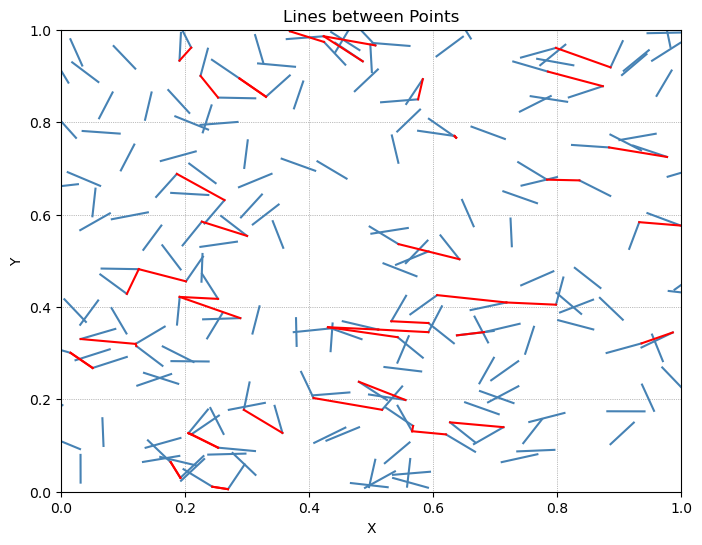

In [37]:
plot_lines_intersection(N)

In [36]:
def plot_lines_intersection_agora_vai(N):
    # Define custom colors
    line_color = 'steelblue'
    line_color_1 = 'red'
    marker_color = 'none'

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=line_color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)
  
    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()


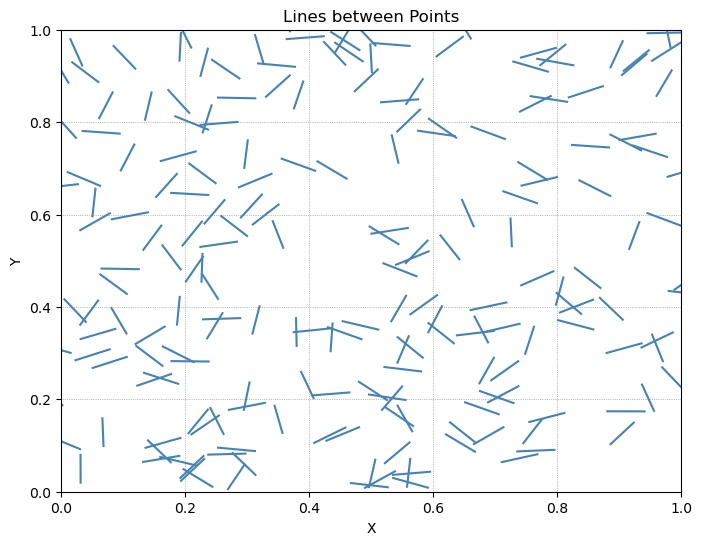

In [38]:
plot_lines_intersection_agora_vai(N)

In [39]:
def plot_lines_try_3(N, intersection_points):
    # Define custom colors
    line_color = 'steelblue'
    marker_color = 'none'
    intersection_color = 'red'  # Color for intersection points

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Check if the points are in intersection_points
        if (points_1[i] in intersection_points) or (points_2[i] in intersection_points):
            color = intersection_color
        else:
            color = line_color

        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()


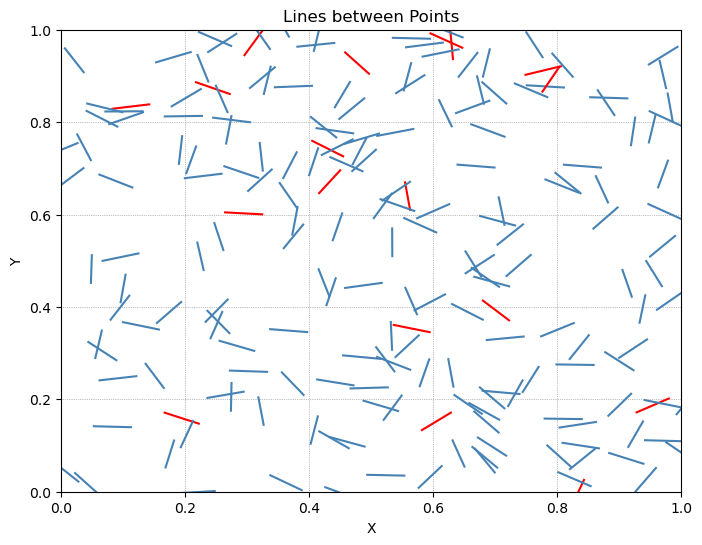

In [40]:
plot_lines_try_3(N, intersection_points_1)

In [41]:
def plot_lines_try_4(N, intersection_points):
    # Define custom colors
    line_color = 'steelblue'
    marker_color = 'none'
    intersection_color = 'red'  # Color for intersection points

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Check if the points are in intersection_points
        if (points_1[i] in intersection_points) or (points_2[i] in intersection_points):
            color = intersection_color
        else:
            color = line_color

        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()


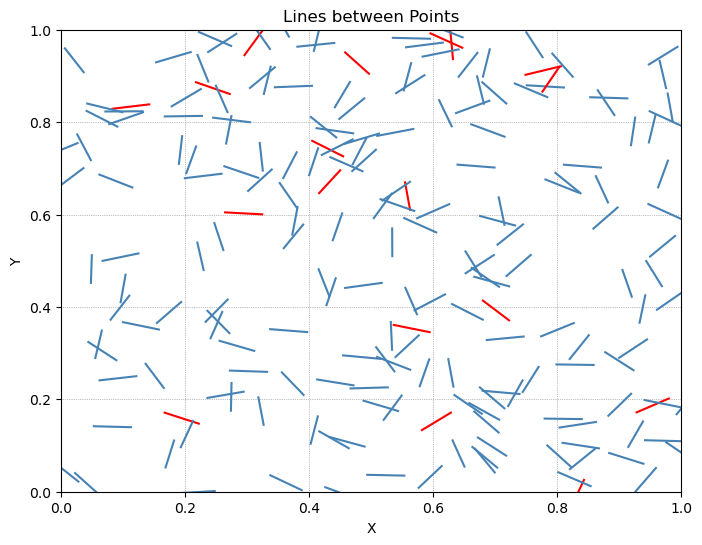

In [42]:
plot_lines_try_4(N, intersection_points_1)

In [43]:
def plot_lines_again(N, intersection_points):
    # Define custom colors
    line_color = 'steelblue'
    marker_color = 'none'
    intersection_color = 'red'  # Color for lines with intersecting points

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Check if the current index corresponds to an intersection point
        if points_2[i] in intersection_points:
            line_color = intersection_color
        else:
            line_color = 'steelblue'

        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=line_color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()


In [44]:
plot_lines_again(N, intersection_points)

NameError: name 'intersection_points' is not defined

In [45]:
def find_intersection_points_20(points, angles, a):
    for i in range(len(points)-1):
        x1, y1 = points[i]
        theta1 = angles[i]
        for j in range(i+1, len(points)):
            x2, y2 = points[j]
            theta2 = angles[j]
            theta = theta1 - theta2
            x = x2 - x1
            y = y2 - y1 + a

            x_old = x2 + x1
            y_old = y2 + y1 - a

            if is_point_inside_region_1(x, y, theta, a):
                plt.plot(x_old/2, y_old/2, 'ro')  # Plot intersection point in red
            elif is_point_inside_region_2(x, y, theta, a):
                plt.plot(x_old/2, y_old/2, 'bo')  # Plot intersection point in blue
            elif is_point_inside_region_3(x, y, theta, a):
                plt.plot(x_old/2, y_old/2, 'go')  # Plot intersection point in green
            elif is_point_inside_region_4(x, y, theta, a):
                plt.plot(x_old/2, y_old/2, 'yo')  # Plot intersection point in yellow
            #else:
                #print("There is no intersection!")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


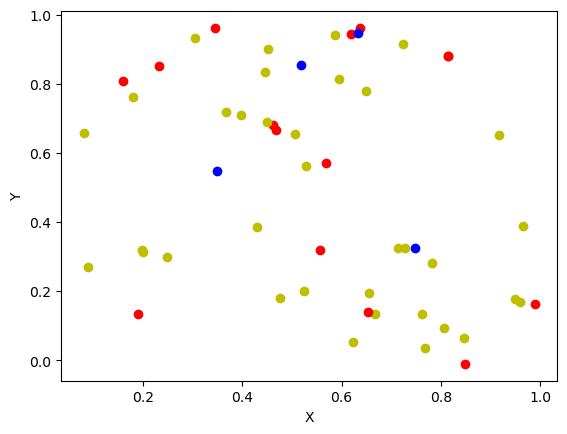

In [47]:
find_intersection_points_20(points_1, alphas, a)

In [48]:
def plot_lines_with_intersections(points, angles, a):
    intersecting_lines = []  # Store intersecting lines
    
    for i in range(len(points)-1):
        x1, y1 = points[i]
        theta1 = angles[i]
        
        for j in range(i+1, len(points)):
            x2, y2 = points[j]
            theta2 = angles[j]
            theta = theta1 - theta2
            x = x2 - x1
            y = y2 - y1 + a
            
            x_old = x2 + x1
            y_old = y2 + y1 - a
            
            if is_point_inside_region_1(x, y, theta, a):
                intersecting_lines.append((points[i], points[j]))
            elif is_point_inside_region_2(x, y, theta, a):
                intersecting_lines.append((points[i], points[j]))
            elif is_point_inside_region_3(x, y, theta, a):
                intersecting_lines.append((points[i], points[j]))
            elif is_point_inside_region_4(x, y, theta, a):
                intersecting_lines.append((points[i], points[j]))

    # Plotting the lines
    for line in intersecting_lines:
        x_coords = [line[0][0], line[1][0]]
        y_coords = [line[0][1], line[1][1]]
        plt.plot(x_coords, y_coords, color='red')  # Change color as desired

    plt.show()

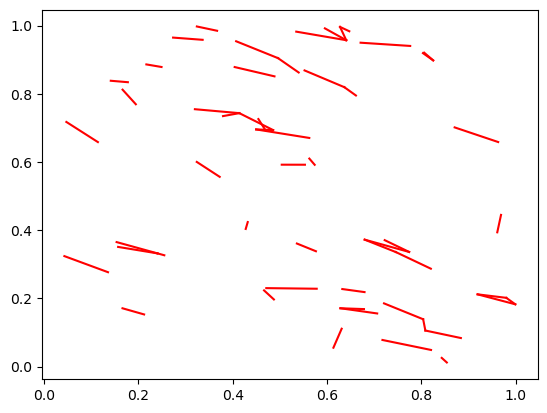

In [50]:
plot_lines_with_intersections(points_1, alphas, a)